# Deskripsi Proyek

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*. Anda pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

# Instruksi Tugas
1. Muat datanya.
2. Pastikan bahwa datamu sudah bebas dari masalah — tidak ada nilai yang hilang, outlier, dan sebagainya.
3. Kerjakan tiap tugas dan jawab pertanyaan yang diajukan pada template proyek tugas akhir.
4. Buat kesimpulan berdasarkan pengalamanmu saat mengerjakan tugas.

# Deskripsi Data
Dataset kamu disimpan dalam file /datasets/insurance_us.csv. Kamu bisa mengunduh dataset tersebut di sini.
- Fitur-fitur: gender, usia, gaji, dan jumlah anggota keluarga dari orang yang diasuransikan.
- Target: besaran klaim yang diterima orang yang diasuransikan selama lima tahun terakhir.

# Pra-pemrosesan & Eksplorasi Data

## Inisialisasi

In [1]:
!pip install scikit-learn --upgrade --user

In [2]:
# Import Library
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Muat Data

Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Kami mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df

,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# Anda mungkin ingin mengganti tipe data untuk kolom age (dari float ke int), tetapi ini tidak terlalu penting untuk dilakukan
# ketik kode untuk mengubah tipe data di sini jika Anda memilih untuk melakukannya:
df['age'] = df['age'].astype(int)

In [8]:
# periksa apakah proses pengubahannya sudah berhasil
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# Sekarang, amati statistika deskriptif dari data kita. 
# Apakah semuanya sudah benar?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [10]:
# Check Misiing Values
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

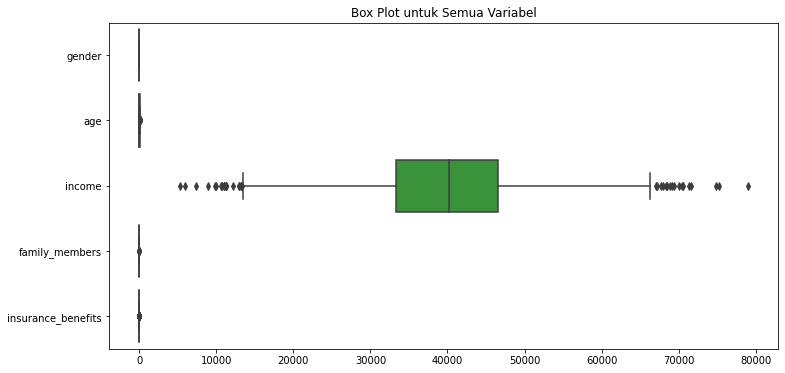

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identifikasi Outlier:
# Visualisasi Box Plot untuk semua variabel (numerik dan kategorikal)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')  # orient='h' untuk membuat box plot horizontal
plt.title('Box Plot untuk Semua Variabel')
plt.show()

Boxplot Gender, Age, Family Members, dan Insurance Benefits:

- Variabel-variabel ini memiliki box plot yang berupa garis lurus karena mereka bersifat biner atau kategorikal (0 atau 1).
- Pada garis lurus tersebut, tumpukan titik di tengahnya menunjukkan distribusi data di antara kelas 0 dan 1.
- Pada variabel gender, garis lurus tidak memiliki tumpukan titik karena gender bersifat biner tanpa variasi.

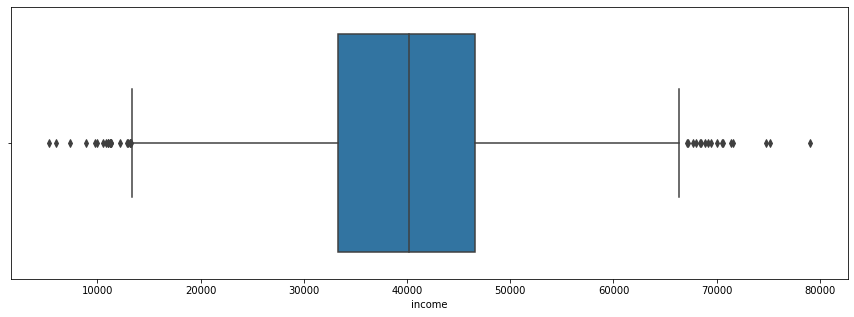

In [12]:
# Melihat outlier pada variabel income
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['income'])
plt.show()

Boxplot Income:

- Batas bawah whisker (garis di bawah kotak) dan batas atas whisker (garis di atas kotak) menunjukkan rentang normal data, dan titik di luar batas tesebut dapat dianggap sebagai outlier.
- Anda telah mencatat outlier bawah di sekitar 3000-13000 dan outlier atas di sekitar 66000-79000. Ini adalah nilai yang berada di luar batas whisker dan dapat diperhatikan lebih lanjut.

In [13]:
# Deskripsi statistik sebelum penanganan outlier
df['income'].describe()

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: income, dtype: float64

In [14]:
# Identifikasi outlier
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)]

In [15]:
# Menghitung jumlah total outlier
jumlah_total_outlier = len(outliers)

print("Jumlah Total Outlier:", jumlah_total_outlier)

Jumlah Total Outlier: 37


In [16]:
# Hitung total data
total_data = len(df)

In [17]:
# Menghitung Persentase Outlier
persentase_outlier = (jumlah_total_outlier / total_data) * 100
print(f'Persentase Outlier :  {persentase_outlier} %')

Persentase Outlier :  0.74 %


In [18]:
# Menentukan batas atas untuk outlier
upper_limit = df['income'].quantile(0.95)

In [19]:
# Menentukan batas bawah untuk outlier
lower_limit = df['income'].quantile(0.05)

In [20]:
# Menggantikan nilai outlier dengan batas atas
df['income'] = np.where(df['income'] > upper_limit, upper_limit, np.where(df['income'] < lower_bound, lower_bound, df['income']))


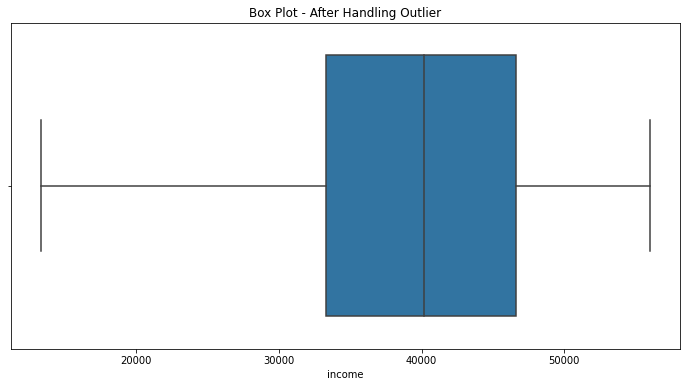

In [21]:
# Box Plot setelah penanganan outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['income'])
plt.title('Box Plot - After Handling Outlier')
plt.show()

In [22]:
# Deskripsi statistik setelah penanganan outlier
df['income'].describe()

count     5000.000000
mean     39719.240000
std       9439.180656
min      13350.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      56000.000000
Name: income, dtype: float64

In [23]:
# Hitung jumlah outlier setelah penanganan
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_after_handling = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)]
print("Jumlah outlier setelah penanganan:", len(outliers_after_handling))

Jumlah outlier setelah penanganan: 0


**Kesimpulan :**
- Tidak ada missing values
- Ditemukan outlier pada data income dan sudah dilakukan penanganan terhadapu outlier tersebut.

## EDA

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

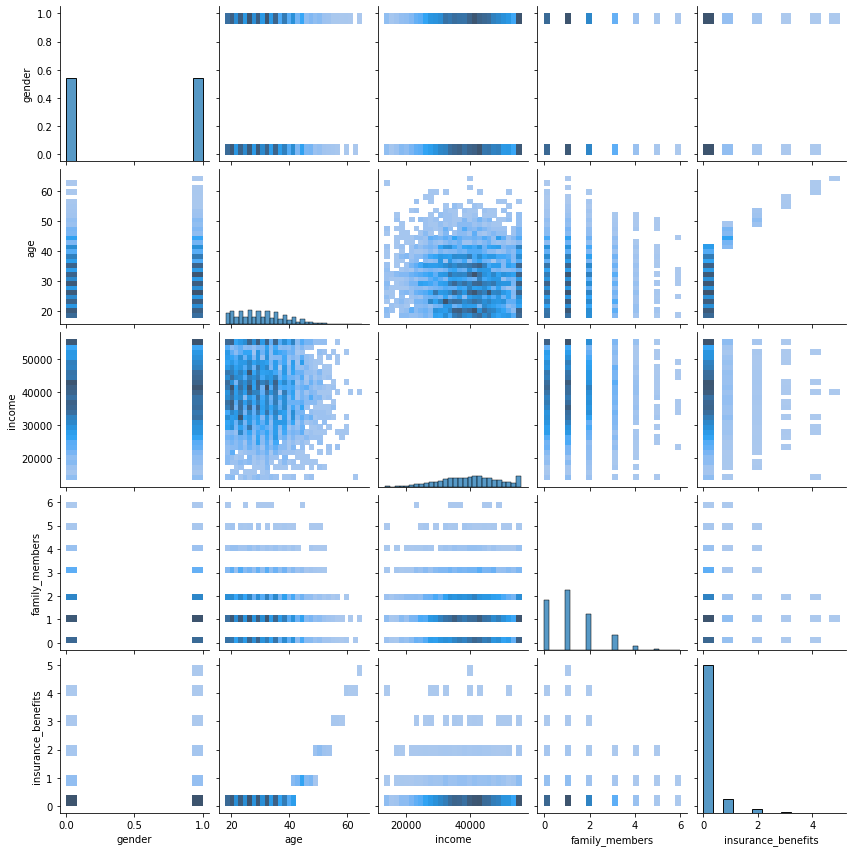

In [24]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

### Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [25]:
from sklearn.neighbors import NearestNeighbors
feature_names = ['gender', 'age', 'income', 'family_members']

In [26]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric) # < ketik kode program Anda di sini > 
    # Fit the NearestNeighbors dengan data
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

#### **Mengatur skala data.**

##### **Data yang tidak diskalakan:**

In [27]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [28]:
knn_result_unscaled = get_knn(df, n=0, k=5, metric='euclidean')
print("Hasil kNN untuk Data Tidak Diskalakan:")
print(knn_result_unscaled)

Hasil kNN untuk Data Tidak Diskalakan:
      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051
4031       1   44  49600.0               2                   1  3.162278
3424       0   38  49600.0               0                   0  3.316625


/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


##### **Data yang diskalakan:**

In [29]:
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

knn_result_scaled_euclidean = get_knn(df_scaled, n=0, k=5, metric='euclidean')
print("Hasil kNN untuk Data Diskalakan (Euclidean):")
print(knn_result_scaled_euclidean)

Hasil kNN untuk Data Diskalakan (Euclidean):
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.885714        0.166667                   0  0.000000
2689     1.0  0.630769  0.894643        0.166667                   0  0.008929
133      1.0  0.615385  0.898214        0.166667                   0  0.019823
4869     1.0  0.646154  0.900000        0.166667                   1  0.020994
124      1.0  0.661538  0.896429        0.166667                   1  0.032581


/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [30]:
knn_result_scaled_manhattan = get_knn(df_scaled, n=0, k=5, metric='manhattan')
print("\nHasil kNN untuk Data Diskalakan (Manhattan):")
print(knn_result_scaled_manhattan)


Hasil kNN untuk Data Diskalakan (Manhattan):
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.885714        0.166667                   0  0.000000
2689     1.0  0.630769  0.894643        0.166667                   0  0.008929
133      1.0  0.615385  0.898214        0.166667                   0  0.027885
4869     1.0  0.646154  0.900000        0.166667                   1  0.029670
124      1.0  0.661538  0.896429        0.166667                   1  0.041484


/home/jovyan/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [31]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
4008,1.0,0.338462,0.512500,0.166667,0
3513,1.0,0.553846,0.737500,0.000000,0
257,0.0,0.569231,0.937500,0.500000,0
1875,0.0,0.615385,0.891071,0.166667,0
4563,1.0,0.338462,1.000000,0.166667,0


Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

Jawab pertanyaannya:

**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

Jawaban : Ya, data yang tidak berskala dapat memengaruhi algoritme kNN. KNN rentan terhadap skala data, yang berarti variabel dengan skala yang lebih besar dapat mendominasi perhitungan jarak. Hal ini dapat menyebabkan fitur dengan skala kecil memiliki dampak yang lebih kecil pada perhitungan jarak. Oleh karena itu, penting untuk melakukan penskalaan data sebelum menerapkan kNN.

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

Jawaban : Hasil dari metrik jarak Euklides dan Manhattan akan berbeda karena cara perhitungan jaraknya yang berbeda. Metrik Euklides mengukur jarak "garis lurus" antara dua titik, sementara metrik Manhattan mengukur jarak "di sepanjang sumbu" (horizontal dan vertikal). Oleh karena itu, hasil k-nearest neighbors akan bervariasi tergantung pada metrik jarak yang digunakan. Dengan atau tanpa skala, perbedaan ini akan tetap terlihat.

### Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [32]:
# Hitung tagetnya
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int) # <kode program Anda di sini>

In [33]:
# periksa ketidakseimbangan kelas dengan value_counts()
# < ketik kode program Anda di sini >
class_counts = df['insurance_benefits_received'].value_counts()
print(class_counts)

0    4436
1     564
Name: insurance_benefits_received, dtype: int64


In [34]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [35]:
# menghasilkan output dari model acak

def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [36]:
# Uji model dummy untuk empat nilai probabilitas
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df)) # < ketik kode program Anda di sini > 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probabilitasnya: 0.11
F1: 0.12
Matriks Kesalahan
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probabilitasnya: 0.50
F1: 0.20
Matriks Kesalahan
[[0.456  0.4312]
 [0.053  0.0598]]

Probabilitasnya: 1.00
F1: 0.20
Matriks Kesalahan
[[0.     0.8872]
 [0.     0.1128]]



### Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [37]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y # < ketik kode program Anda di sini >

    def predict(self, X):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) # < ketik kode program Anda di sini >
        # menghitung nilai prediksi
        y_pred = X2 @ self.weights # < ketik kode program Anda di sini >
        
        return y_pred

In [38]:
import math
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    print(f'R2: {r2_score:.2f}')    

In [39]:
# Melakukan regresi linear
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()
lr.fit(X_train, y_train)
print("Weights:", lr.weights)

y_test_pred = lr.predict(X_test)
print("\nEvaluasi Regresi Linear:")
eval_regressor(y_test, y_test_pred)

Weights: [-9.42743111e-01  3.57489434e-02  1.64003270e-02 -2.81074656e-07
 -1.16939117e-02]

Evaluasi Regresi Linear:
RMSE: 0.34
R2: 0.43


### Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

di mana **X'** adalah matriks data yang sudah ditransformasikan, **X** adalah matriks data asli, dan **P** adalah matriks invertible yang digunakan untuk transformasi. 
Dengan perkalian ini, setiap entri dalam **X'** akan dipengaruhi oleh nilai-nilai dalam **P**, menciptakan data yang terdistorsi secara linier.

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [40]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [41]:
X = df_pn.to_numpy()

#### Membuat matriks acak $P$.

In [42]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

#### Memeriksa apakah matriks $P$ *invertible*

In [43]:
try:
    P_inv = np.linalg.inv(P)
    print("Matriks P adalah invertible.")
except np.linalg.LinAlgError:
    print("Matriks P tidak invertible.")

Matriks P adalah invertible.


Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?

Jawaban : 
Setelah transformasi, kita menggunakan perhitungan relatif yang melibatkan pembagian dengan nilai yang sangat kecil atau nol. Pada saaat kita membagi sesuatu dengan nilai yang sangat kecil atau nol, hasilnya bisa menjadi sangat besar, bahkan tak terhingga (inf).

In [44]:
# Transformasi data
X_transformed = X @ P

Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

In [45]:
# Pemulihan data ke semula
X_restored = X_transformed @ np.linalg.inv(P)

Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [46]:
# Pilih beberapa baris acak
sample_rows = np.random.choice(X.shape[0], size=5, replace=False)
sample_rows

array([4081, 2996,  985,   10, 1520])

In [47]:
# Pilih beberapa kolom acak
sample_cols = np.random.choice(X.shape[1], size=3, replace=False)
sample_cols

array([1, 0, 3])

In [48]:
# Menampilkan data asli
print("Data Asli:")
print(X[sample_rows, :][:, sample_cols])

Data Asli:
[[21.  1.  0.]
 [22.  1.  0.]
 [37.  0.  0.]
 [25.  1.  1.]
 [25.  0.  0.]]


In [49]:
# Menampilkan data yang sudah ditransformasikan
print("\nData yang Sudah Ditransformasikan:")
print(X_transformed[sample_rows, :][:, sample_cols])


Data yang Sudah Ditransformasikan:
[[20648.60290344  5870.35605689 42463.04120771]
 [18577.80321147  5281.12752393 38200.70832331]
 [10485.05178619  2975.72083994 21530.03212058]
 [16509.77752582  4692.73121079 33940.17480624]
 [18084.8666684   5139.71110399 37182.92766046]]


In [50]:
# Menampilkan data yang telah dipulihkan ke semula
print("\nData yang Telah Dipulihkan:")
print(X_restored[sample_rows, :][:, sample_cols])


Data yang Telah Dipulihkan:
[[ 2.10000000e+01  1.00000000e+00  4.44012387e-12]
 [ 2.20000000e+01  1.00000000e+00 -6.86274081e-13]
 [ 3.70000000e+01 -1.13257224e-12 -2.08654811e-13]
 [ 2.50000000e+01  1.00000000e+00  1.00000000e+00]
 [ 2.50000000e+01 -2.95153657e-12 -2.26511701e-12]]


In [51]:
# Perbandingan nilai asli dan nilai yang dipulihkan
absolute_difference = np.abs(X - X_restored)
relative_difference = np.abs((X - X_restored) / (X + 1e-10))

print("Perbedaan Absolut:")
print(absolute_difference[sample_rows, :][:, sample_cols])

print("\nPerbedaan Relatif:")
print(relative_difference[sample_rows, :][:, sample_cols])

Perbedaan Absolut:
[[3.22231131e-12 6.04249983e-12 4.44012387e-12]
 [5.50315349e-12 2.00484074e-12 6.86274081e-13]
 [5.54223334e-13 1.13257224e-12 2.08654811e-13]
 [1.37490019e-12 7.32613969e-12 3.69926312e-12]
 [8.66862138e-13 2.95153657e-12 2.26511701e-12]]

Perbedaan Relatif:
[[1.53443396e-13 6.04249983e-12 4.44012387e-02]
 [2.50143340e-13 2.00484074e-12 6.86274081e-03]
 [1.49790090e-14 1.13257224e-02 2.08654811e-03]
 [5.49960077e-14 7.32613969e-12 3.69926312e-12]
 [3.46744855e-14 2.95153657e-02 2.26511701e-02]]


Mungkin Anda bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

Jawaban :

Perbedaan nilai yang tidak benar-benar sama antara data asli dan data yang dipulihkan setelah transformasi terjadi karena adanya pembulatan atau kesalahan numerik selama proses transformasi dan pemulihan.

Perbedaan Absolut: Nilai-nilai yang dihasilkan oleh proses pemulihan memiliki kesalahan kecil yang dapat dilihat sebagai angka mendekati nol pada skala numerik tertentu.

Perbedaan Relatif: Beberapa nilai relatif mendekati atau sama dengan tak hingga (inf) karena adanya pembagian dengan nilai yang sangat kecil atau nol selama proses pemulihan.

**Kesimpulan:**

- Data Asli:
[[21.  1.  0.]
 [22.  1.  0.]
 [37.  0.  0.]
 [25.  1.  1.]
 [25.  0.  0.]]
 
- Data yang Sudah Ditransformasikan:
[[20648.60290344  5870.35605689 42463.04120771]
 [18577.80321147  5281.12752393 38200.70832331]
 [10485.05178619  2975.72083994 21530.03212058]
 [16509.77752582  4692.73121079 33940.17480624]
 [18084.8666684   5139.71110399 37182.92766046]]
 
- Data yang Telah Dipulihkan:
[[ 2.10000000e+01  1.00000000e+00  4.44012387e-12]
 [ 2.20000000e+01  1.00000000e+00 -6.86274081e-13]
 [ 3.70000000e+01 -1.13257224e-12 -2.08654811e-13]
 [ 2.50000000e+01  1.00000000e+00  1.00000000e+00]
 [ 2.50000000e+01 -2.95153657e-12 -2.26511701e-12]]

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Jawaban**

- Jika $w_P$ tidak berbeda secara signifikan dari $w$, maka pengaburan data tidak memiliki efek yang nyata terhadap prediksi regresi linear.

- RMSE, sebagai metrik evaluasi, akan mencerminkan seberapa baik model dapat memprediksi nilai target, dan apakah pengaburan data memengaruhi kualitas prediksi atau tidak. Jika RMSE tetap serupa setelah pengaburan data, kita dapat menyimpulkan bahwa pengaburan tidak signifikan dalam hal prediksi regresi linear.

**Bukti analitis**

Jawaban:

Ketika kita memiliki regresi linear dengan bobot w, diperoleh dari:

$
w=(X^TX)^{−1}X^Ty
$

Setelah pengaburan data dengan matriks invertible $P$, bobot $wp$ diperoleh dari:

$
wp=[(XP)^TXP)]^{−1}(XP)^Ty
$

Dengan mensederhanakan rumus, kita dapat menghubungkan $wp$ dan $w$ :

$wp$ = $P^{-1}w$

Jika $wp$ tidak berbeda secara signifikan dari $w$, maka pengaburan data tidak memiliki efek nyata terhadap prediksi regresi linear.

- **Prediksi $wp$ :**

Prediksi $wp$ adalah invers dari matriks pengaburan $P$ x dengan $w$ :

$wp$ = $P^{-1}w$



- **Arti bagi Kualitas Regresi Linear:**

Jika RMSE (Root Mean Squared Error) tetap serupa setelah pengaburan data, itu menunjukkan bahwa pengaburan tidak signifikan dalam hal prediksi regresi linear. RMSE yang tetap stabil menunjukkan bahwa kualitas prediksi tidak banyak berubah, sehingga efek pengaburan data terhadap prediksi dapat diabaikan.




## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [53]:
class BlurredLinearRegression:
    def __init__(self):
        self.P = None
        self.model = LinearRegression()

    def _generate_invertible_matrix(self, size):
        rng = np.random.default_rng(seed=42)
        while True:
            P = rng.random(size=(size, size))
            if np.linalg.matrix_rank(P) == size:
                return P

    def fit(self, X, y):
        n_features = X.shape[1]

        # Generate invertible matrix P
        self.P = self._generate_invertible_matrix(n_features)

        # Transform data
        X_blurred = X @ self.P

        # Fit the model
        self.model.fit(X_blurred, y)

    def predict(self, X):
        # Transform input features
        X_blurred = X @ self.P

        # Predict using the blurred model
        return self.model.predict(X_blurred)

    def evaluate(self, X, y):
        # Predict using the blurred model
        y_pred = self.predict(X)

        # Calculate RMSE and R2
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)

        return rmse, r2

In [54]:
# Mengasumsikan X_train and y_train adalah data awal/original dari training data
blurred_lr = BlurredLinearRegression()
blurred_lr.fit(X_train, y_train)

In [55]:
# Mengasumsikan X_test and y_test adalah data awal/original dari testing data
rmse, r2 = blurred_lr.evaluate(X_test, y_test)

In [56]:
print(f"RMSE dengan pengaburan data: {rmse}")
print(f"R2 score dengan pengaburan data: {r2}")

RMSE dengan pengaburan data: 0.3435576668645527
R2 score dengan pengaburan data: 0.4305240154517187


**Kesimpulan:**
- RMSE dengan pengaburan data: 0.34
- R2 score dengan pengaburan data: 0.43

# Kesimpulan

- Tahap Inisialisasi: 
    - Tidak ada missing values
    - Ditemukan outlier pada data income dan sudah dilakukan penanganan terhadapu outlier tersebut.
    
- Tahap EDA
    - Evaluasi Regresi Linear:
        RMSE: 0.34
        R2: 0.43
    - Data Asli:
        [[21.  1.  0.]
         [22.  1.  0.]
         [37.  0.  0.]
         [25.  1.  1.]
         [25.  0.  0.]]
 
    - Data yang Sudah Ditransformasikan:
        [[20648.60290344  5870.35605689 42463.04120771]
         [18577.80321147  5281.12752393 38200.70832331]
         [10485.05178619  2975.72083994 21530.03212058]
         [16509.77752582  4692.73121079 33940.17480624]
         [18084.8666684   5139.71110399 37182.92766046]]
 
    - Data yang Telah Dipulihkan:
        [[ 2.10000000e+01  1.00000000e+00  4.44012387e-12]
         [ 2.20000000e+01  1.00000000e+00 -6.86274081e-13]
         [ 3.70000000e+01 -1.13257224e-12 -2.08654811e-13]
         [ 2.50000000e+01  1.00000000e+00  1.00000000e+00]
         [ 2.50000000e+01 -2.95153657e-12 -2.26511701e-12]]
         

# Apendiks 

## Apendiks A: Menulis Rumus di Jupyter Notebooks

Anda dapat menulis rumus di Jupyter Notebook dalam bahasa *markup* yang disediakan oleh sistem penerbitan berkualitas tinggi bernama $\LaTeX$ (diucapkan "Lah-tech"), dan rumus tersebut akan terlihat seperti rumus yang ada di buku teks.

Untuk memasukkan rumus ke dalam teks, letakkan tanda dolar (\\$) sebelum dan sesudah teks rumus. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Jika rumus harus ditulis dalam satu paragraf tersendiri, letakkan dua tanda dolar (\\$\\$) sebelum dan sesudah teks.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Bahasa markup [LaTeX](https://en.wikipedia.org/wiki/LaTeX) sangat populer di kalangan orang-orang yang menggunakan rumus dalam artikel, buku, dan teks. Bahasa tesebut memang tampak rumit, tetapi dasarnya sebenarnya mudah. Periksa dua halaman [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) berikut untuk mempelajari cara membuat rumus yang paling umum.

## Apendiks B: Properti Matriks

Matriks memiliki banyak properti di Aljabar Linear. Beberapa di antaranya ada di daftar berikut yang dapat membantu pembuktian analitis dalam proyek ini.

<table>
<tr>
<td>Pendistribusian</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-komutativitas</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Properti asosiatif dari perkalian</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Properti identitas perkalian</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilitas dari transposisi hasil kali matriks,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>